# CEERS-JWST/HST GALFIT-M Fitting Results Visualization

In [1]:
# This notebook is for illustrating the GALFIT-M fitting results for multi-wavelength morphology fitting;
import os
import trilogy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from astropy.io import fits
from astropy.table import Table, Column, vstack, hstack
from astropy.visualization import simple_norm, SqrtStretch, SinhStretch, LogStretch

from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image

In [2]:
# Set the infomation of passband:

filters = ['hst_acs_f606w', 
           'hst_acs_f814w', 
           'jwst_nircam_f115w', 
           'jwst_nircam_f150w', 
           'jwst_nircam_f200w', 
           'jwst_nircam_f277w', 
           'jwst_nircam_f356w', 
           'jwst_nircam_f410m', 
           'jwst_nircam_f444w', 'rgb']

nbands = len(filters) - 1          # the number of filters used in the morphology fitting (except the rgb band)

filters_labels = {}
filters_labels[filters[0]] = 'HST/ACS F606W'
filters_labels[filters[1]] = 'HST/ACS F814W'
filters_labels[filters[2]] = 'JWST/NIRCam F115W'
filters_labels[filters[3]] = 'JWST/NIRCam F150W'
filters_labels[filters[4]] = 'JWST/NIRCam F200W'
filters_labels[filters[5]] = 'JWST/NIRCam F277W'
filters_labels[filters[6]] = 'JWST/NIRCam F356W'
filters_labels[filters[7]] = 'JWST/NIRCam F410M'
filters_labels[filters[8]] = 'JWST/NIRCam F444W'
filters_labels[filters[9]] = 'RGB'

filters_tag = {}
filters_tag[filters[0]] = 'f606w'
filters_tag[filters[1]] = 'f814w'
filters_tag[filters[2]] = 'f115w'
filters_tag[filters[3]] = 'f150w'
filters_tag[filters[4]] = 'f200w'
filters_tag[filters[5]] = 'f277w'
filters_tag[filters[6]] = 'f356w'
filters_tag[filters[7]] = 'f410m'
filters_tag[filters[8]] = 'f444w'

pointing = ['nircam1', 
            'nircam2', 
            'nircam3', 
            'nircam4', 
            'nircam5', 
            'nircam6', 
            'nircam7', 
            'nircam8', 
            'nircam9', 
            'nircam10']

hst = ['hst_acs_f606w', 
       'hst_acs_f814w', 
       'hst_wfc3_ir_f125w', 
       'hst_wfc3_ir_f140w', 
       'hst_wfc3_ir_f160w']

jwst = ['jwst_nircam_f115w', 
        'jwst_nircam_f150w', 
        'jwst_nircam_f200w', 
        'jwst_nircam_f277w', 
        'jwst_nircam_f356w', 
        'jwst_nircam_f410m', 
        'jwst_nircam_f444w']

In [3]:
file_dir = '/home/phylmf/Code/ceers_resolved_analysis_v2/20240103_MSFG_morph/galfitm_test/gal_results.fits'

hdu = fits.open(file_dir)
hdu.info()

Filename: /home/phylmf/Code/ceers_resolved_analysis_v2/20240103_MSFG_morph/galfitm_test/gal_results.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  INPUT_f606w    1 PrimaryHDU      21   (83, 83)   float64   
  1  INPUT_f814w    1 ImageHDU        22   (83, 83)   float64   
  2  INPUT_f115w    1 ImageHDU        22   (83, 83)   float64   
  3  INPUT_f150w    1 ImageHDU        22   (83, 83)   float64   
  4  INPUT_f200w    1 ImageHDU        22   (83, 83)   float64   
  5  INPUT_f277w    1 ImageHDU        22   (83, 83)   float64   
  6  INPUT_f356w    1 ImageHDU        22   (83, 83)   float64   
  7  INPUT_f410m    1 ImageHDU        22   (83, 83)   float64   
  8  INPUT_f444w    1 ImageHDU        22   (83, 83)   float64   
  9  MODEL_f606w    1 ImageHDU       320   (83, 83)   float64   
 10  MODEL_f814w    1 ImageHDU       320   (83, 83)   float64   
 11  MODEL_f115w    1 ImageHDU       320   (83, 83)   float64   
 12  MODEL_f150w    1 ImageHDU       320   (83, 83)  

From input file None :
From input parameters:
samplesize = 83
stampsize = 83
maxstampsize = 83
deletetests = 1
deletefilters = 1
testfirst = 0
showwith = PIL
mode = RGB
imagesRGB = {'R': ['./rgb_temp_fits/r.fits[0]'], 'G': ['./rgb_temp_fits/g.fits[0]'], 'B': ['./rgb_temp_fits/b.fits[0]']}
noiselums = {'R': 0.15, 'G': 0.15, 'B': 0.15}
outname = ./rgb_temp_fits/rgb
satpercent = 0.001
noiselum = 0.3
noisesig = 1
noisesig0 = 2
correctbias = 0
colorsatfac = 1
combine = sum
show = False
invert = False
Default:
indir =  (default)
outdir =  (default)
thumbnail = None (default)
sampledx = 0 (default)
sampledy = 0 (default)
showstamps = 0 (default)
scaling = None (default)
legend = 0 (default)
noise = None (default)
saturate = None (default)
bscale = 1 (default)
bzero = 0 (default)
Loading image data.
If multiple filters per channel, adding data.
B
./rgb_temp_fits/b.fits[0] (83, 83) 
B = 

G
./rgb_temp_fits/g.fits[0] (83, 83) 
G = 

R
./rgb_temp_fits/r.fits[0] (83, 83) 
R = 


Determining image 

/home/phylmf/anaconda3/lib/python3.10/site-packages/trilogy/trilogy.py:307: RuntimeWarning: invalid value encountered in divide
  z = np.log10(d) / r1
/home/phylmf/anaconda3/lib/python3.10/site-packages/trilogy/trilogy.py:311: RuntimeWarning: invalid value encountered in cast
  z = z.astype(np.uint8)


From input file None :
From input parameters:
samplesize = 83
stampsize = 83
maxstampsize = 83
deletetests = 1
deletefilters = 1
testfirst = 0
showwith = PIL
mode = RGB
imagesRGB = {'R': ['./rgb_temp_fits/r.fits[0]'], 'G': ['./rgb_temp_fits/g.fits[0]'], 'B': ['./rgb_temp_fits/b.fits[0]']}
noiselums = {'R': 0.15, 'G': 0.15, 'B': 0.15}
outname = ./rgb_temp_fits/rgb
satpercent = 0.001
noiselum = 0.3
noisesig = 1
noisesig0 = 2
correctbias = 0
colorsatfac = 1
combine = sum
show = False
invert = False
Default:
indir =  (default)
outdir =  (default)
thumbnail = None (default)
sampledx = 0 (default)
sampledy = 0 (default)
showstamps = 0 (default)
scaling = None (default)
legend = 0 (default)
noise = None (default)
saturate = None (default)
bscale = 1 (default)
bzero = 0 (default)
Loading image data.
If multiple filters per channel, adding data.
B
./rgb_temp_fits/b.fits[0] (83, 83) 
B = 

G
./rgb_temp_fits/g.fits[0] (83, 83) 
G = 

R
./rgb_temp_fits/r.fits[0] (83, 83) 
R = 


Determining image 

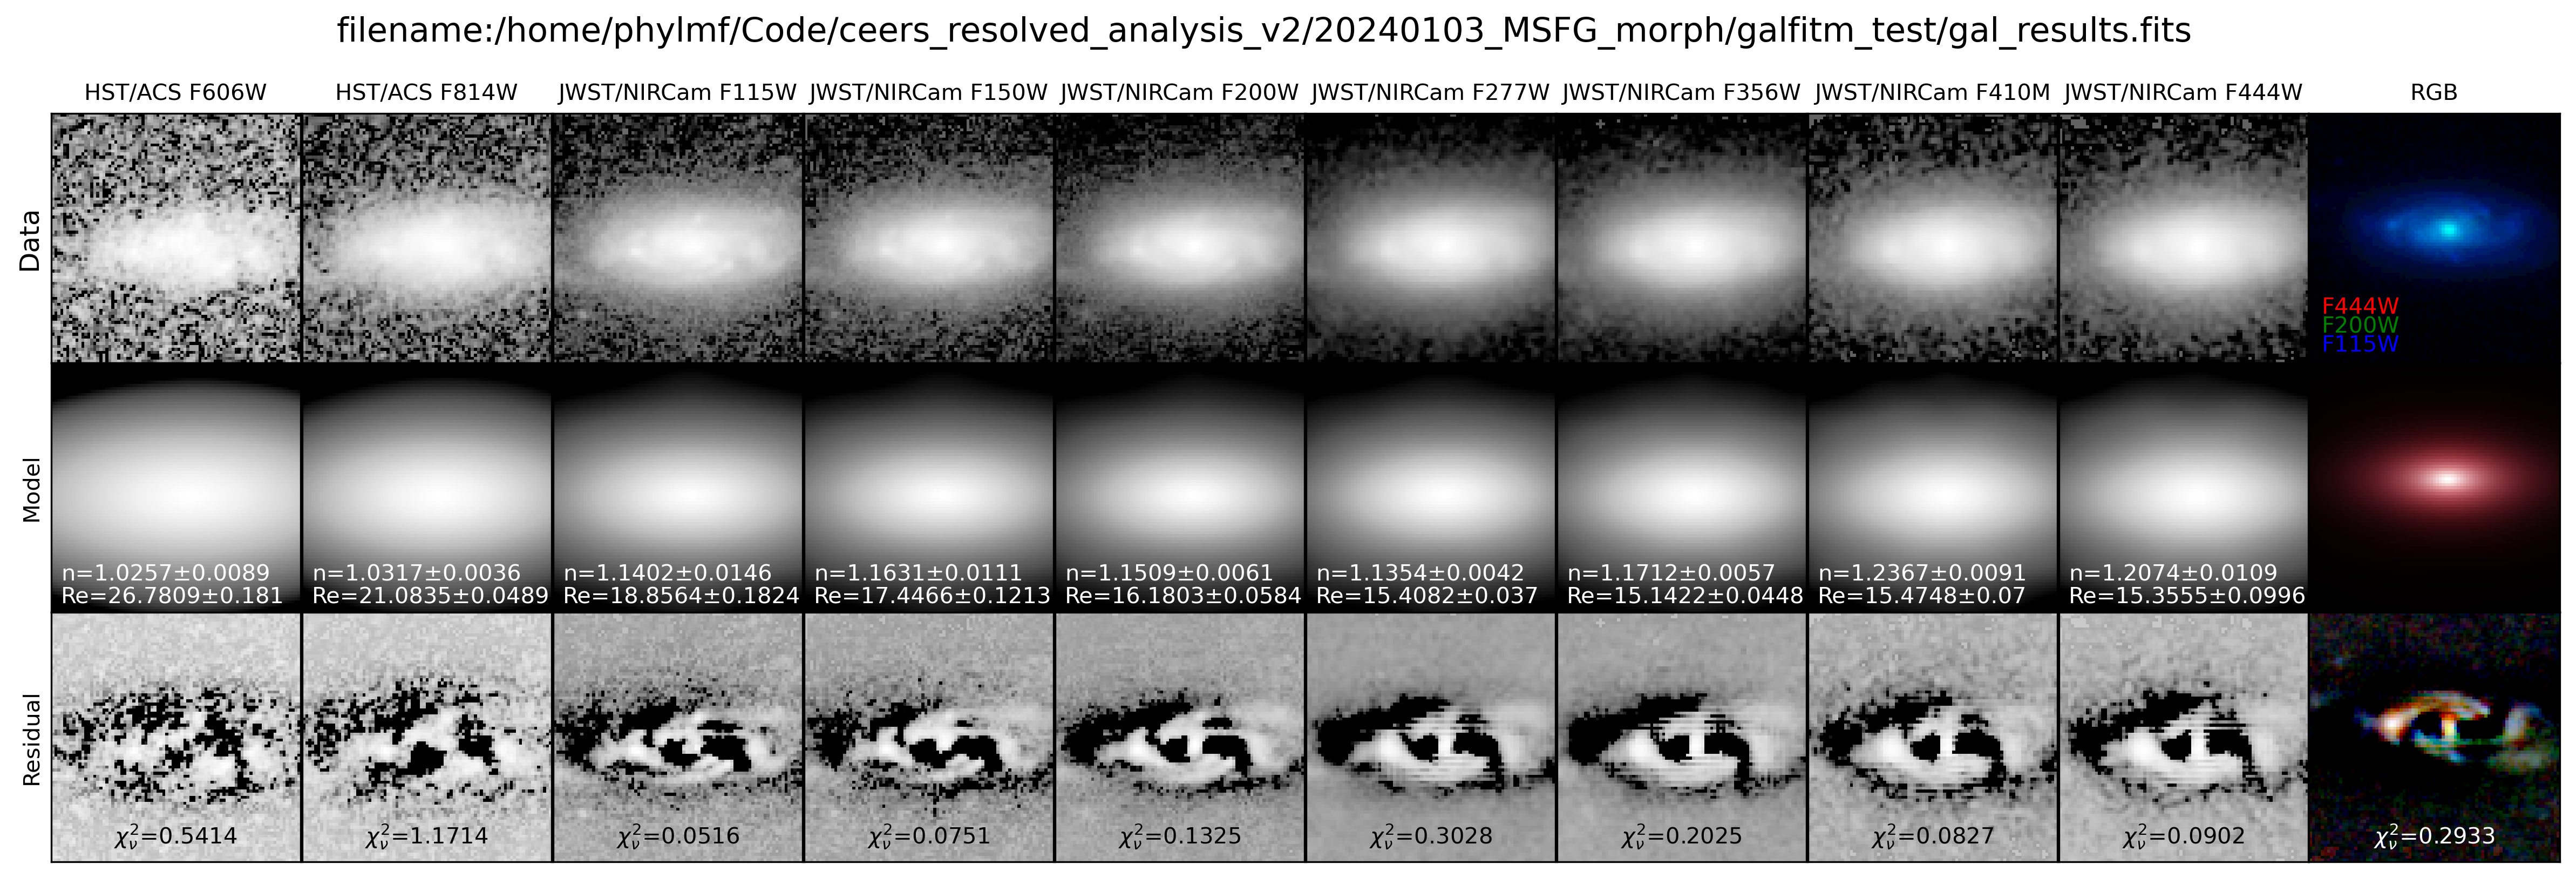

In [12]:
# define a function to exatract the GALFIT-M fitting results

def get_val(input_val):
    import re
    pattern = r'([-+]?\d+\.\d+)\s+\+/-\s+([-+]?\d+\.\d+)'
    match = re.search(pattern, input_val)
    if match:
        value_str = match.group(1)
        err_str = match.group(2)
        value = float(value_str)
        err = float(err_str)
        return value, err
    else:
        raise ValueError("Input format doesn't match expected pattern")

%matplotlib inline

width_ratios = []
height_ratios = [1, 1, 1]

for i in range(nbands + 1):
    width_ratios.append(1)

fig1, axs = plt.subplots(ncols = nbands + 1, nrows = 3, 
                        sharex = True, sharey = True, figsize = (2 * (nbands + 1), 6), dpi = 300)
axs = axs.flatten()

gs = gridspec.GridSpec(ncols = nbands + 1, nrows = 3, 
                       width_ratios = width_ratios, 
                       height_ratios = height_ratios, figure = fig1)

text_kwargs = dict(horizontalalignment = 'left', verticalalignment = 'top', linespacing = 5)

# set the filters information

for i in range(len(filters)):
    axs[i].set_title(filters_labels[filters[i]], color = 'black', fontsize = 10)

# set the ylabel of 'data', 'Model' and 'Residual'

axs[0].set_ylabel('Data', color = 'black', fontsize = 12)
axs[0 + 1 * (nbands + 1)].set_ylabel('Model', color = 'black', fontsize = 10)
axs[0 + 2 * (nbands + 1)].set_ylabel('Residual', color = 'black', fontsize = 10)

# unset the ticks of each axe
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    
# (1) plot the images for 'Data'
data_axs = axs[0:(nbands + 1)]
for i in range(len(filters)):
    if i < nbands:
        img_data = hdu['INPUT_' + filters_tag[filters[i]]].data
        img_norm = simple_norm(img_data, stretch = 'log', min_percent = 10, max_percent = 100.)
        data_axs[i].imshow(img_data, cmap = 'Greys_r', norm = img_norm, origin = 'lower')
    else:
        if os.path.exists('./rgb_temp_fits/') != True:
            os.mkdir('./rgb_temp_fits/')
        fits.writeto('./rgb_temp_fits/r.fits', data = hdu['INPUT_f444w'].data, overwrite = True)
        fits.writeto('./rgb_temp_fits/g.fits', data = hdu['INPUT_f200w'].data, overwrite = True)
        fits.writeto('./rgb_temp_fits/b.fits', data = hdu['INPUT_f115w'].data, overwrite = True)
        imagesRGB = {"R": ['./rgb_temp_fits/r.fits[0]'], \
                     "G": ['./rgb_temp_fits/g.fits[0]'], \
                     "B": ['./rgb_temp_fits/b.fits[0]']}
        noiselums = {'R': 0.15, 'G': 0.15, 'B': 0.15}
        trilogy.Trilogy(infile = None, 
                        samplesize = hdu['INPUT_f444w'].data.shape[0],
                        stampsize = hdu['INPUT_f444w'].data.shape[0],
                        maxstampsize = hdu['INPUT_f444w'].data.shape[0], 
                        deletetests = 1,
                        deletefilters = 1,
                        testfirst = 0,
                        showwith = "PIL", 
                        mode = 'RGB',
                        imagesorder = 'RGB',
                        imagesRGB = imagesRGB,
                        noiselums = noiselums,
                        images = None, 
                        outname = './rgb_temp_fits/rgb',
                        satpercent = 0.001,
                        noiselum = 0.3,
                        noisesig = 1, 
                        noisesig0 = 2,
                        correctbias = 0, 
                        colorsatfac = 1,
                        combine = 'sum',
                        show = False).run()
        img_data = Image.open('./rgb_temp_fits/rgb.png')
        img_data = img_data.resize((hdu['RESIDUAL_f444w'].data.shape[0], hdu['RESIDUAL_f444w'].data.shape[1]))
        img_data = np.array(img_data)
        data_axs[i].imshow(img_data, aspect = 'auto', origin = 'lower')
        os.remove('./rgb_temp_fits/r.fits')
        os.remove('./rgb_temp_fits/g.fits')
        os.remove('./rgb_temp_fits/b.fits')
        os.remove('./rgb_temp_fits/rgb.png')
        # add text for illustrating the RGB config
        data_axs[i].text(0.05, 0.22, 'F444W', 
                         transform = data_axs[i].transAxes, 
                         horizontalalignment = 'left', verticalalignment = 'center', color = 'red', fontsize = 10)
        data_axs[i].text(0.05, 0.145, 'F200W', 
                         transform = data_axs[i].transAxes, 
                         horizontalalignment = 'left', verticalalignment = 'center', color = 'green', fontsize = 10)
        data_axs[i].text(0.05, 0.07, 'F115W', 
                         transform = data_axs[i].transAxes, 
                         horizontalalignment = 'left', verticalalignment = 'center', color = 'blue', fontsize = 10)
# (2) plot the images for 'Model'
model_axs = axs[(nbands + 1): 2 * (nbands + 1)]
for i in range(len(filters)):
    if i < nbands:
        img_data = hdu['MODEL_' + filters_tag[filters[i]]].data
        img_norm = simple_norm(img_data, stretch = 'log', min_percent = 10, max_percent = 100.)
        model_axs[i].imshow(img_data, cmap = 'Greys_r', norm = img_norm, origin = 'lower')    
        # TEXT: add sersic index of fitted model
        sersic_val, sersic_err = round(hdu['FINAL_BAND'].data['COMP2_n '][i], 4), round(hdu['FINAL_BAND'].data['COMP2_n_ERR'][i], 4)
        model_axs[i].text(0.04, 0.15, 'n=' + str(sersic_val) + '±' + str(sersic_err), 
                          transform = model_axs[i].transAxes, 
                          horizontalalignment = 'left', verticalalignment = 'center', color = 'white', fontsize = 10)
        # TEXT: add re of fitted model
        re_val, re_err = round(hdu['FINAL_BAND'].data['COMP2_Re '][i], 4), round(hdu['FINAL_BAND'].data['COMP2_Re_ERR'][i], 4)
        model_axs[i].text(0.04, 0.06, 'Re=' + str(re_val) + '±' + str(re_err), 
                          transform = model_axs[i].transAxes, 
                          horizontalalignment = 'left', verticalalignment = 'center', color = 'white', fontsize = 10)
    else:
        if os.path.exists('./rgb_temp_fits/') != True:
            os.mkdir('./rgb_temp_fits/')
        fits.writeto('./rgb_temp_fits/r.fits', data = hdu['MODEL_f444w'].data, overwrite = True)
        fits.writeto('./rgb_temp_fits/g.fits', data = hdu['MODEL_f200w'].data, overwrite = True)
        fits.writeto('./rgb_temp_fits/b.fits', data = hdu['MODEL_f115w'].data, overwrite = True)
        imagesRGB = {"R": ['./rgb_temp_fits/r.fits[0]'], \
                     "G": ['./rgb_temp_fits/g.fits[0]'], \
                     "B": ['./rgb_temp_fits/b.fits[0]']}
        noiselums = {'R': 0.15, 'G': 0.15, 'B': 0.15}
        trilogy.Trilogy(infile = None, 
                        samplesize = hdu['MODEL_f444w'].data.shape[0],
                        stampsize = hdu['MODEL_f444w'].data.shape[0],
                        maxstampsize = hdu['MODEL_f444w'].data.shape[0], 
                        deletetests = 1,
                        deletefilters = 1,
                        testfirst = 0,
                        showwith = "PIL", 
                        mode = 'RGB',
                        imagesorder = 'RGB',
                        imagesRGB = imagesRGB,
                        noiselums = noiselums,
                        images = None, 
                        outname = './rgb_temp_fits/rgb',
                        satpercent = 0.001,
                        noiselum = 0.3,
                        noisesig = 1, 
                        noisesig0 = 2,
                        correctbias = 0, 
                        colorsatfac = 1,
                        combine = 'sum',
                        show = False).run()
        img_data = Image.open('./rgb_temp_fits/rgb.png')
        img_data = img_data.resize((hdu['RESIDUAL_f444w'].data.shape[0], hdu['RESIDUAL_f444w'].data.shape[1]))
        img_data = np.array(img_data)
        model_axs[i].imshow(img_data, aspect = 'auto', origin = 'lower')
        os.remove('./rgb_temp_fits/r.fits')
        os.remove('./rgb_temp_fits/g.fits')
        os.remove('./rgb_temp_fits/b.fits')
        os.remove('./rgb_temp_fits/rgb.png')
        
# (3) plot the images for 'Residual'
residual_axs = axs[2 * (nbands + 1): 3 * (nbands + 1)]
for i in range(len(filters)):
    if i < nbands:
        img_data = hdu['RESIDUAL_' + filters_tag[filters[i]]].data
        img_norm = simple_norm(img_data, stretch = 'log', min_percent = 10, max_percent = 100.)
        residual_axs[i].imshow(img_data, cmap = 'Greys_r', norm = img_norm, origin = 'lower')
        residual_axs[i].text(0.5, 0.1, r'$\chi^2_{\nu}$=' + str(round(hdu['MODEL_' + filters_tag[filters[i]]].header['CHI2NU'], 4)), 
                             transform = residual_axs[i].transAxes, 
                             horizontalalignment = 'center', verticalalignment = 'center', color = 'black', fontsize = 10)
    else:
        if os.path.exists('./rgb_temp_fits/') != True:
            os.mkdir('./rgb_temp_fits/')
        fits.writeto('./rgb_temp_fits/r.fits', data = hdu['RESIDUAL_f444w'].data, overwrite = True)
        fits.writeto('./rgb_temp_fits/g.fits', data = hdu['RESIDUAL_f200w'].data, overwrite = True)
        fits.writeto('./rgb_temp_fits/b.fits', data = hdu['RESIDUAL_f115w'].data, overwrite = True)
        imagesRGB = {"R": ['./rgb_temp_fits/r.fits[0]'], \
                     "G": ['./rgb_temp_fits/g.fits[0]'], \
                     "B": ['./rgb_temp_fits/b.fits[0]']}
        noiselums = {'R': 0.15, 'G': 0.15, 'B': 0.15}
        trilogy.Trilogy(infile = None, 
                        samplesize = hdu['RESIDUAL_f444w'].data.shape[0],
                        stampsize = hdu['RESIDUAL_f444w'].data.shape[0],
                        maxstampsize = hdu['RESIDUAL_f444w'].data.shape[0], 
                        deletetests = 1,
                        deletefilters = 1,
                        testfirst = 0,
                        showwith = "PIL", 
                        mode = 'RGB',
                        imagesorder = 'RGB',
                        imagesRGB = imagesRGB,
                        noiselums = noiselums,
                        images = None, 
                        outname = './rgb_temp_fits/rgb',
                        satpercent = 0.001,
                        noiselum = 0.3,
                        noisesig = 1, 
                        noisesig0 = 2,
                        correctbias = 0, 
                        colorsatfac = 1,
                        combine = 'sum',
                        show = False).run()
        img_data = Image.open('./rgb_temp_fits/rgb.png')
        img_data = img_data.resize((hdu['RESIDUAL_f444w'].data.shape[0], hdu['RESIDUAL_f444w'].data.shape[1]))
        img_data = np.array(img_data)
        residual_axs[i].imshow(img_data, aspect = 'auto', origin = 'lower')
        os.remove('./rgb_temp_fits/r.fits')
        os.remove('./rgb_temp_fits/g.fits')
        os.remove('./rgb_temp_fits/b.fits')
        os.remove('./rgb_temp_fits/rgb.png')
        residual_axs[i].text(0.5, 0.1, r'$\chi^2_{\nu}$=' + str(round(hdu['FIT_INFO'].data['CHI2NU'][0], 4)), 
                             transform = residual_axs[i].transAxes, 
                             horizontalalignment = 'center', verticalalignment = 'center', color = 'white', fontsize = 10)
fig1.suptitle('filename:' + file_dir, fontsize = 15)
fig1.subplots_adjust(wspace = 0.00, hspace = 0.00)
fig1.savefig('gal_results.pdf', bbox_inches = 'tight', format = 'pdf')
fig1.savefig('gal_results.png', bbox_inches = 'tight', format = 'png', dpi = 300)